In [1]:
import os
import pickle
from collections import Counter
from datetime import datetime, timedelta
from dateutil import parser
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from joblib import Parallel,delayed
import warnings
warnings.filterwarnings('ignore')

In [6]:
def select_categories(data):
    categories = []
    for cat in data.category.unique():
        if data[data.category==cat].user.unique().shape[0]==data.user.unique().shape[0]:
            categories.append(cat)
    return categories

def remove_nonusers(df):
    if df.day.unique().shape[0] < minimum_day_per_user:
        return pd.DataFrame([],columns=df.columns)
    return df

unknown_category = 'Unknown'
start_hour = 5
end_hour  = 24
step = 1
one_minute = 60
day_minimum_threshold = 120
maximum_unknown_percentage = .25
minimum_day_per_user = 50
data = pickle.load(open('../data/activity_mperf_smartphone.p','rb'))
selected_categories = select_categories(data)
data = data[data.category.isin(selected_categories)]
data = data.groupby('user',as_index=False).apply(remove_nonusers)
data['start'] = data['start'].apply(lambda a:parser.parse(pd.to_datetime(a).strftime("%m/%d/%Y, %H:%M")))
data['end'] = data['end'].apply(lambda a:parser.parse(pd.to_datetime(a).strftime("%m/%d/%Y, %H:%M")))

In [52]:
df = data[data.user=='00ab666c-afb8-476e-9872-6472b4e66b68'].sort_values('start').reset_index(drop=True)

In [53]:
df = df[:500]

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# clrs = ['grey' if (x < max(values)) else 'red' for x in values]
selected_categories


['still', 'on_foot', 'in_vehicle']

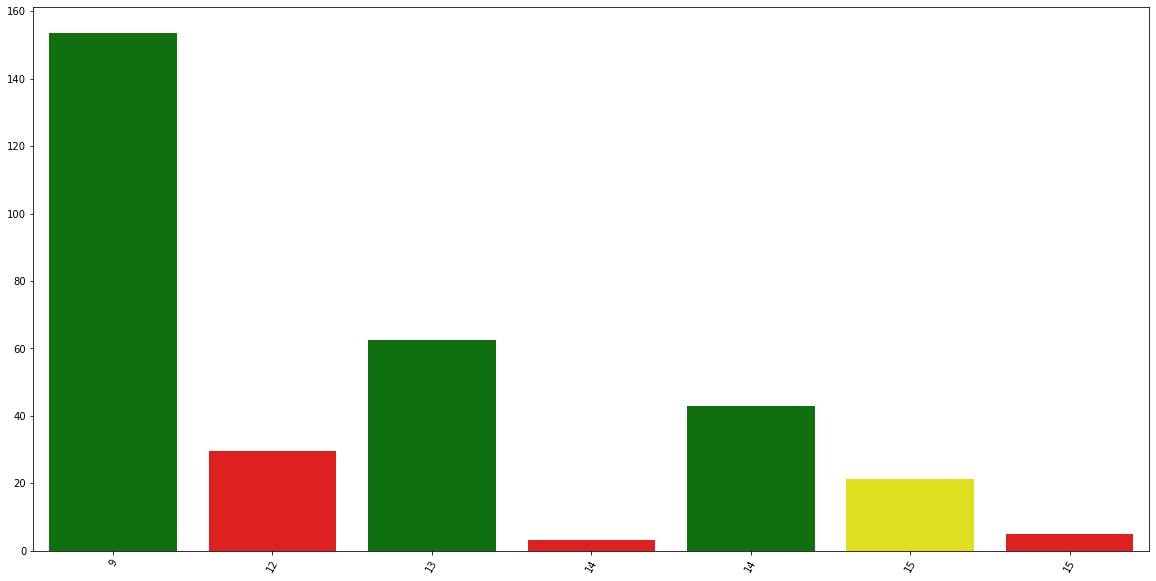

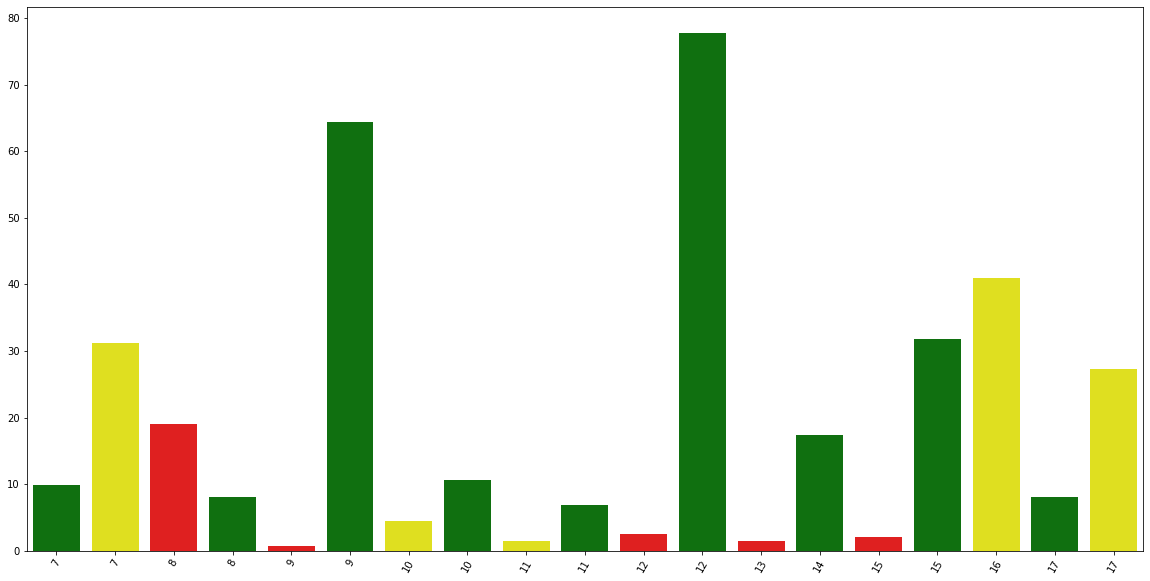

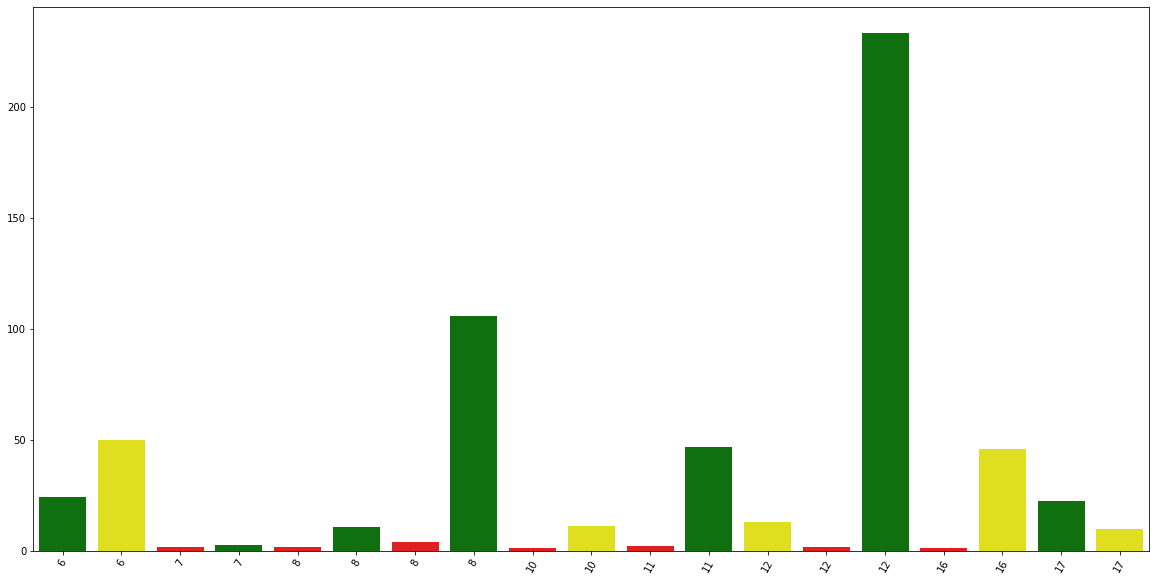

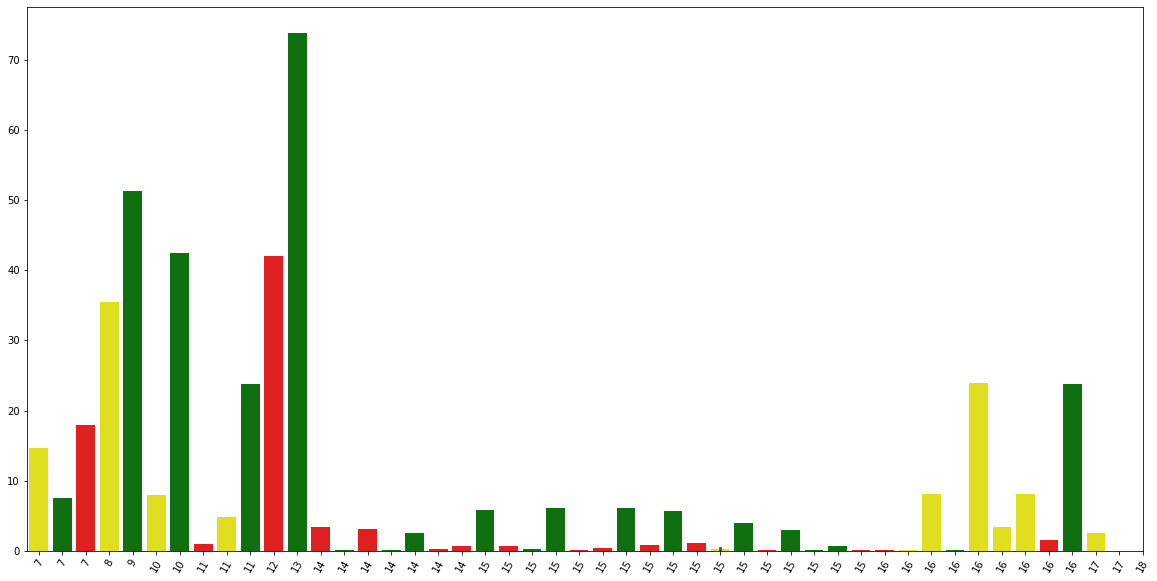

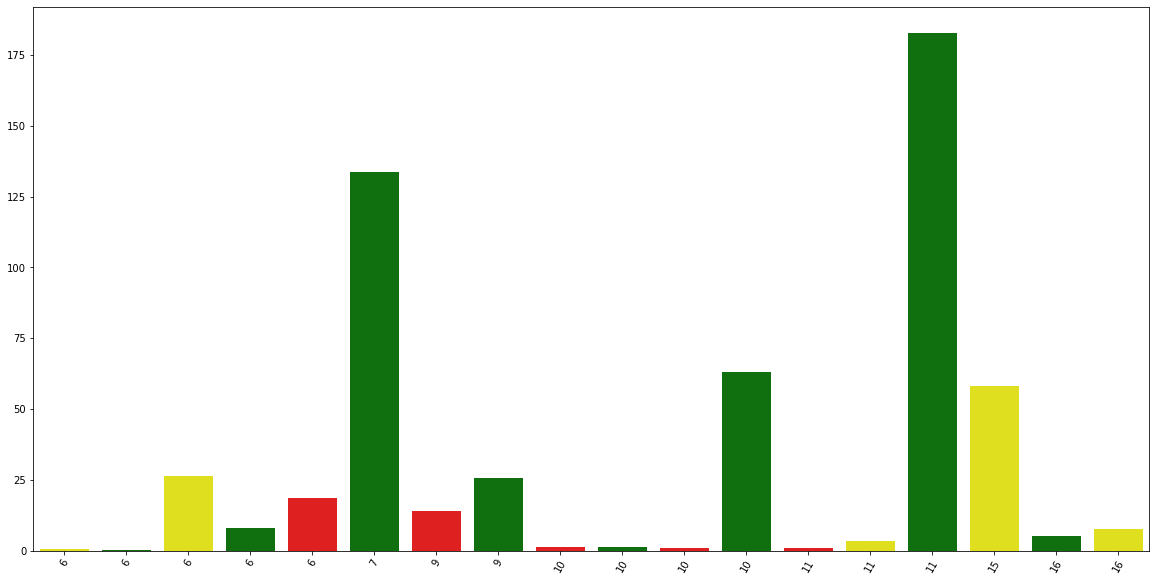

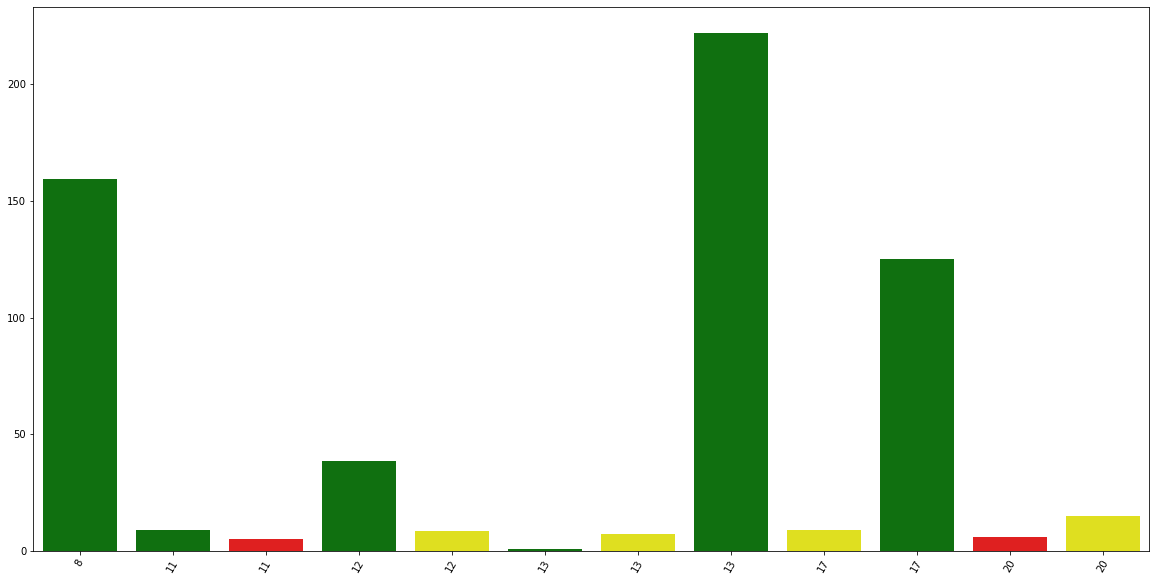

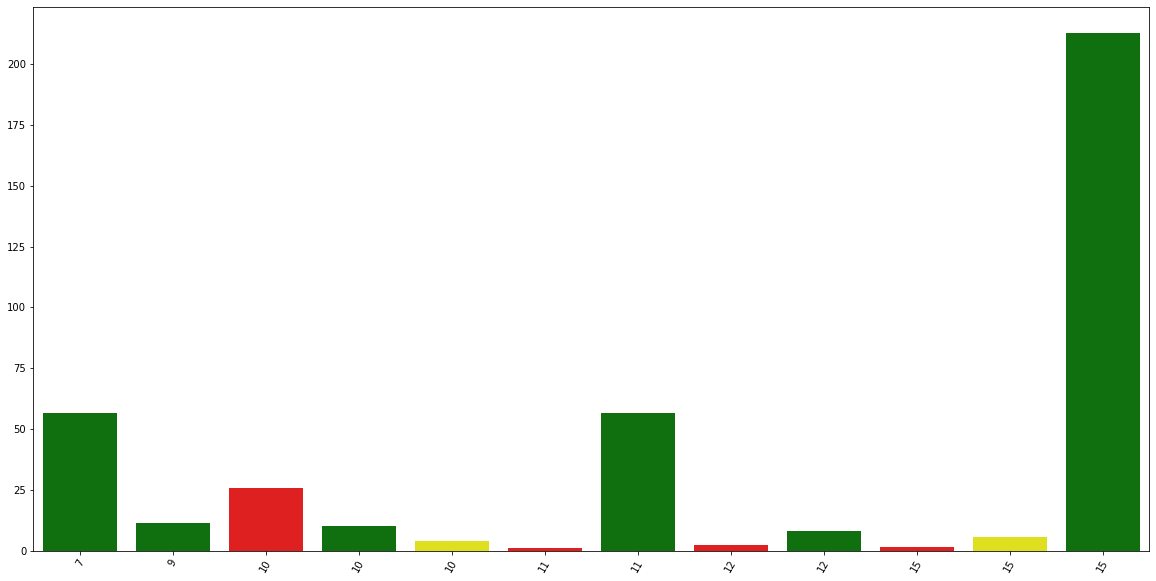

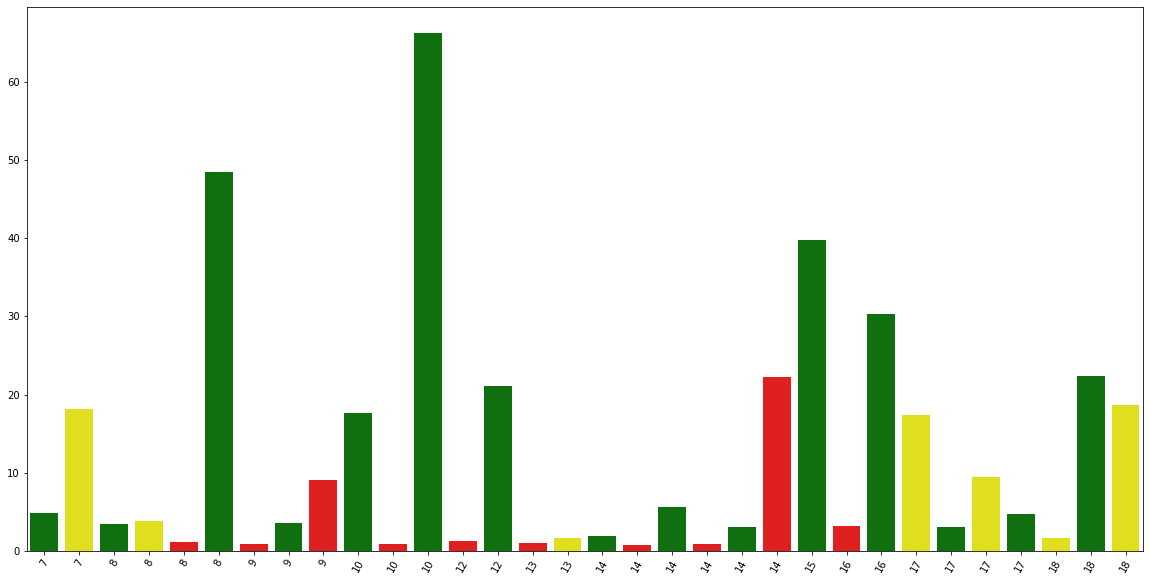

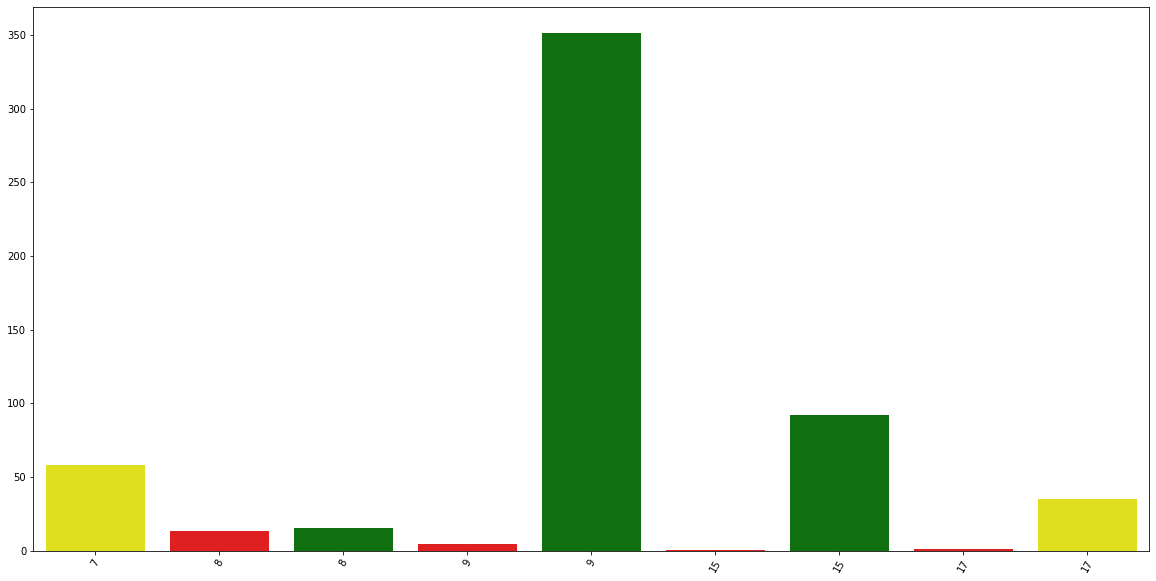

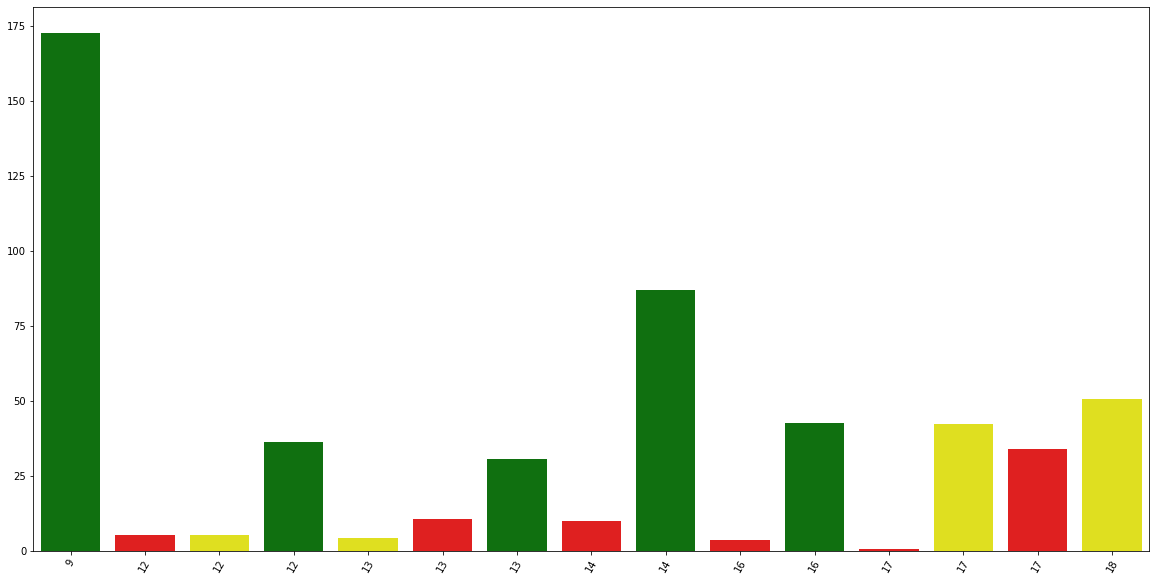

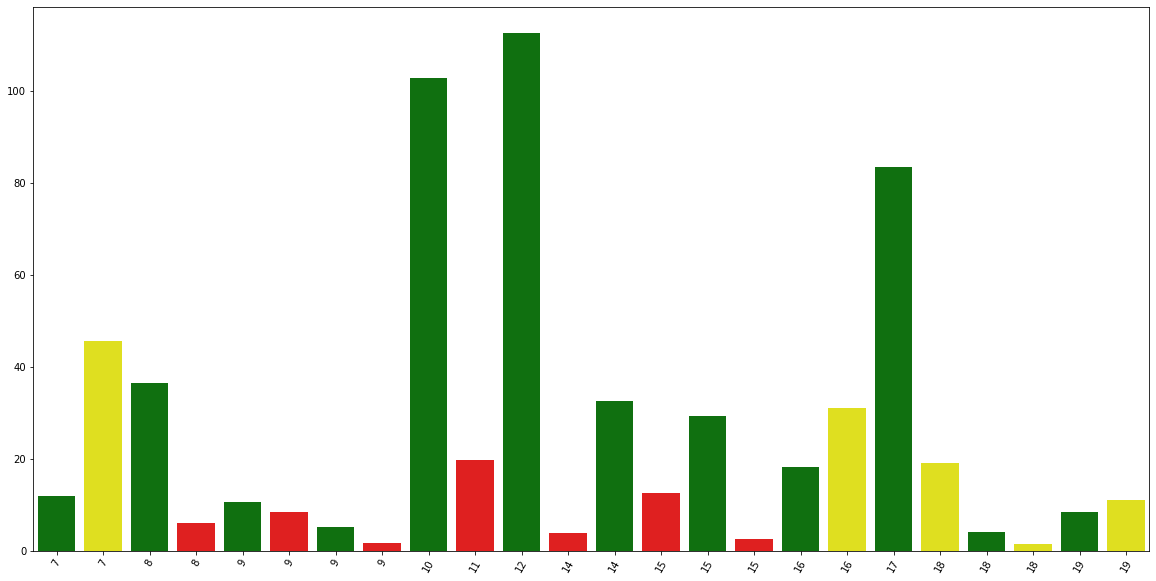

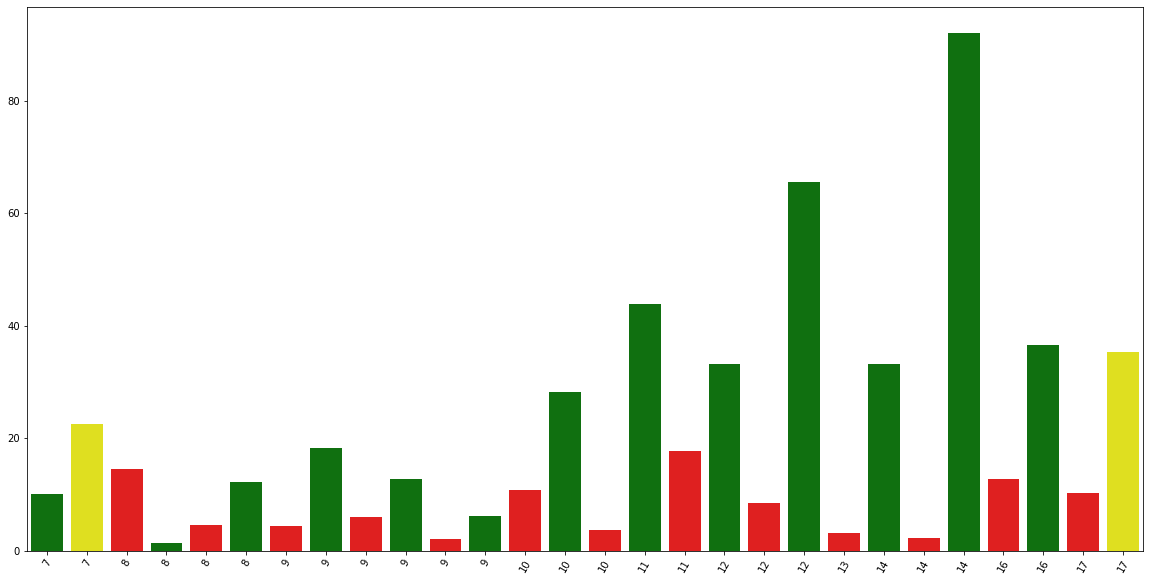

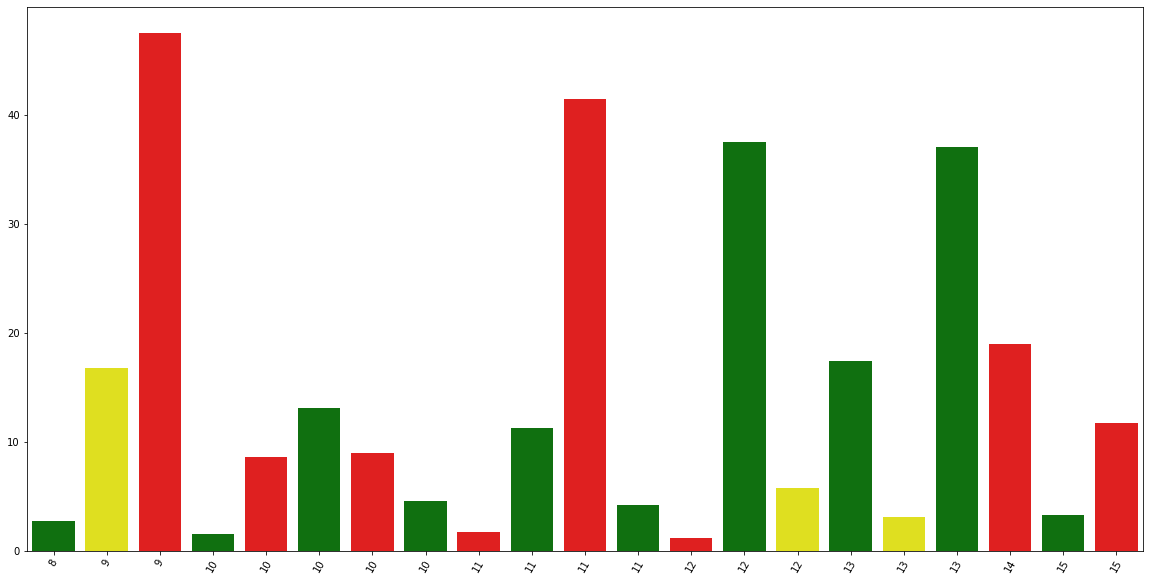

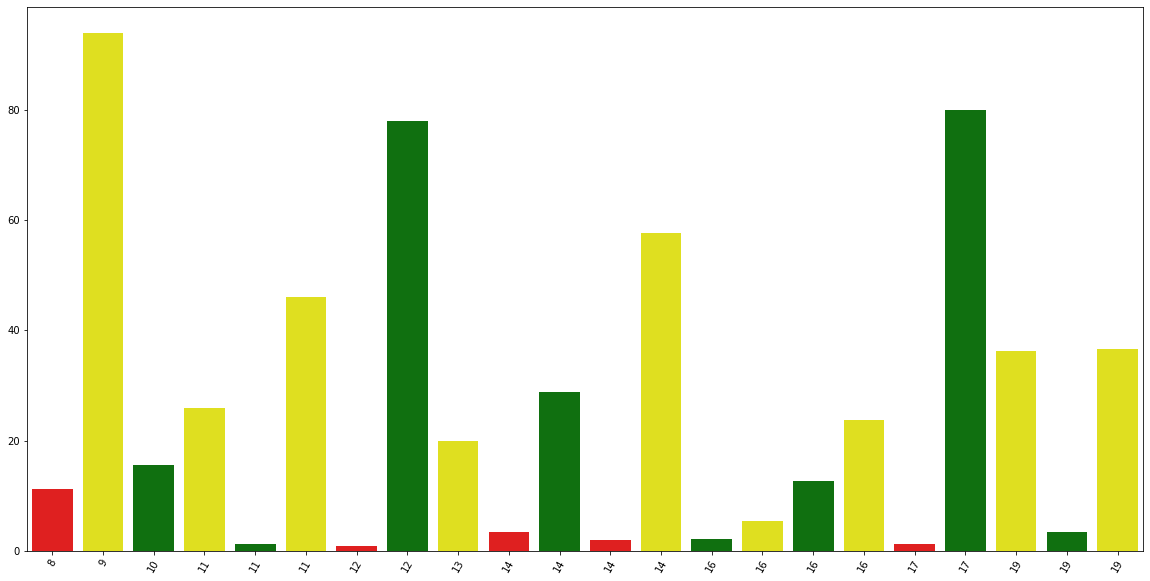

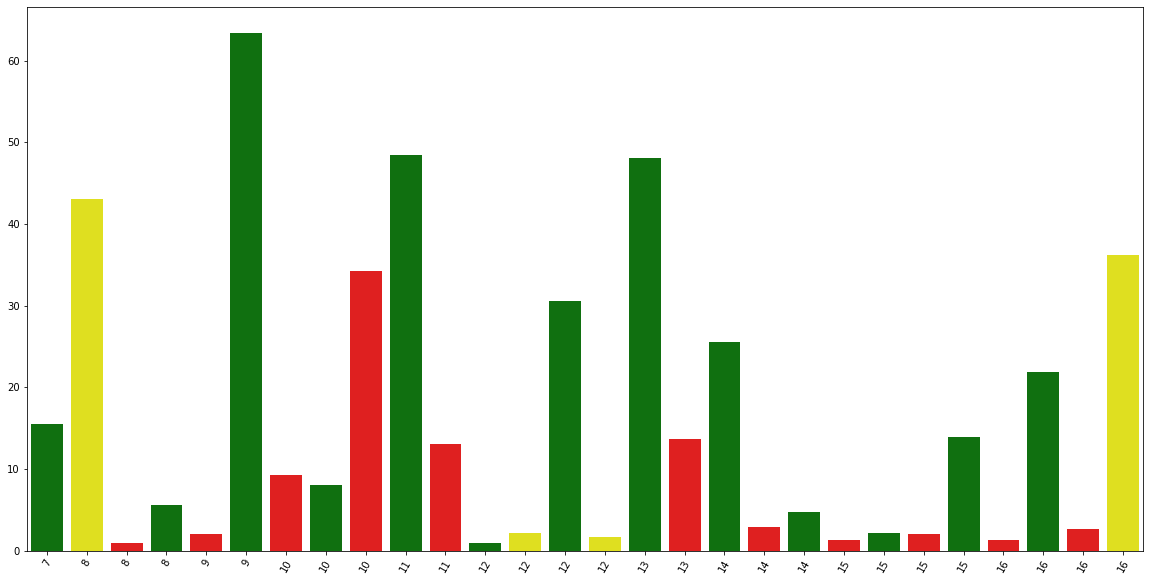

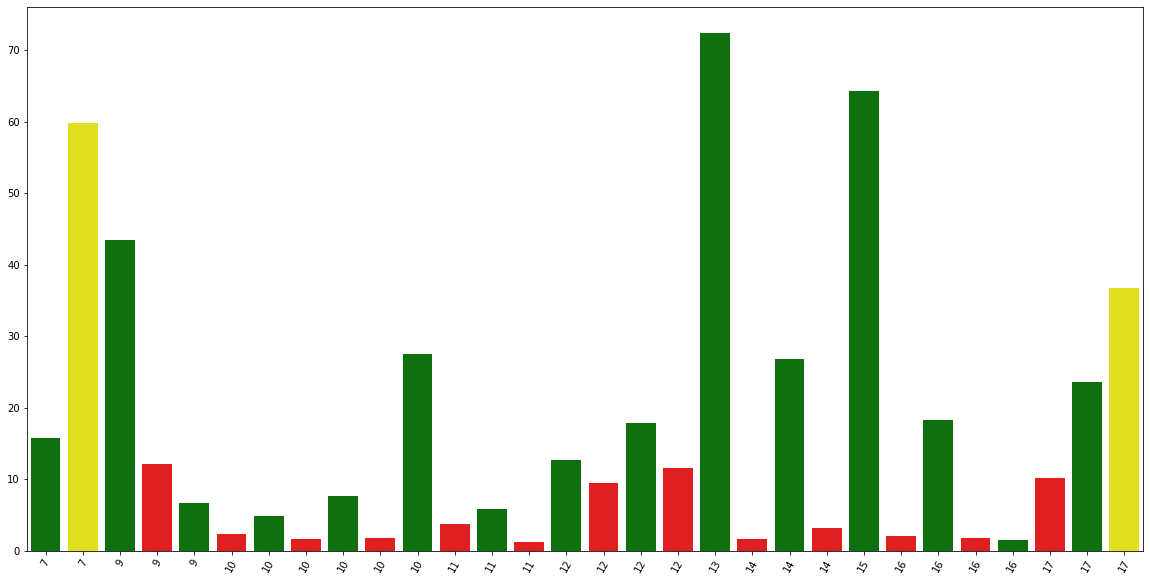

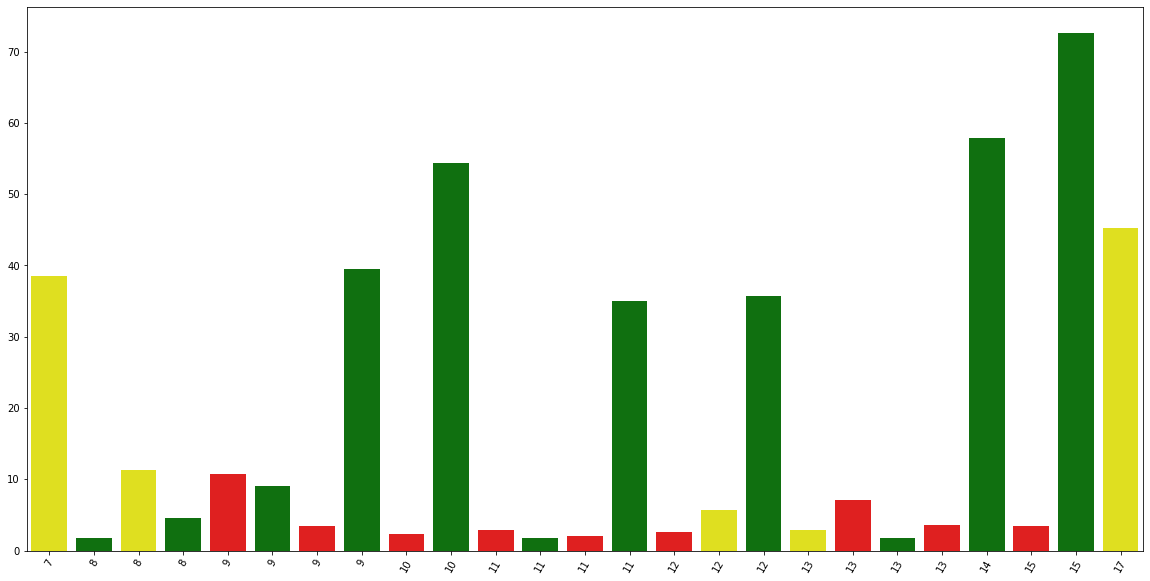

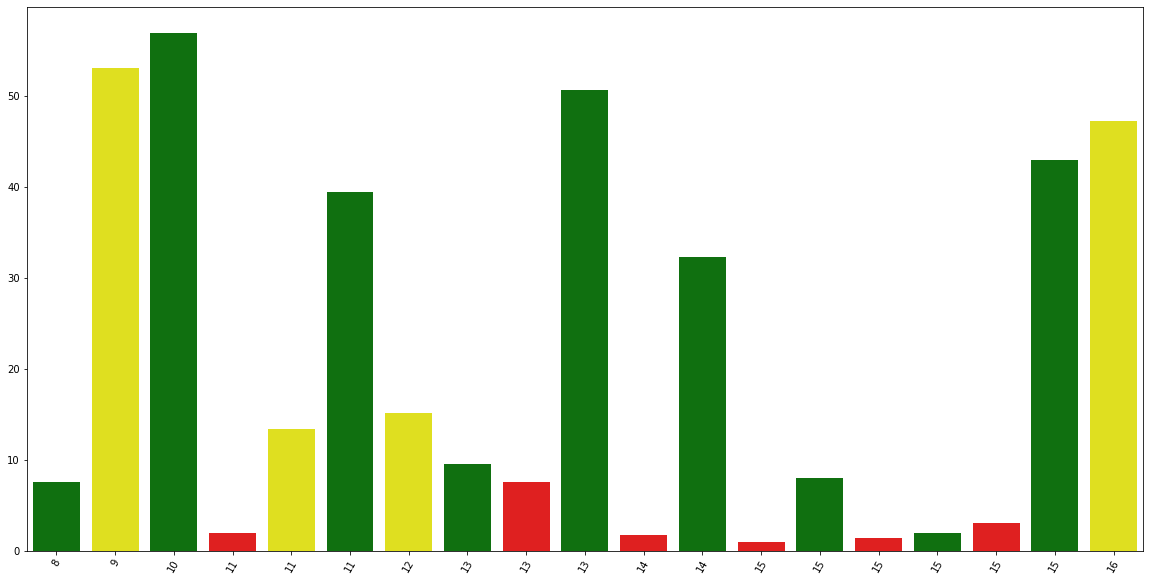

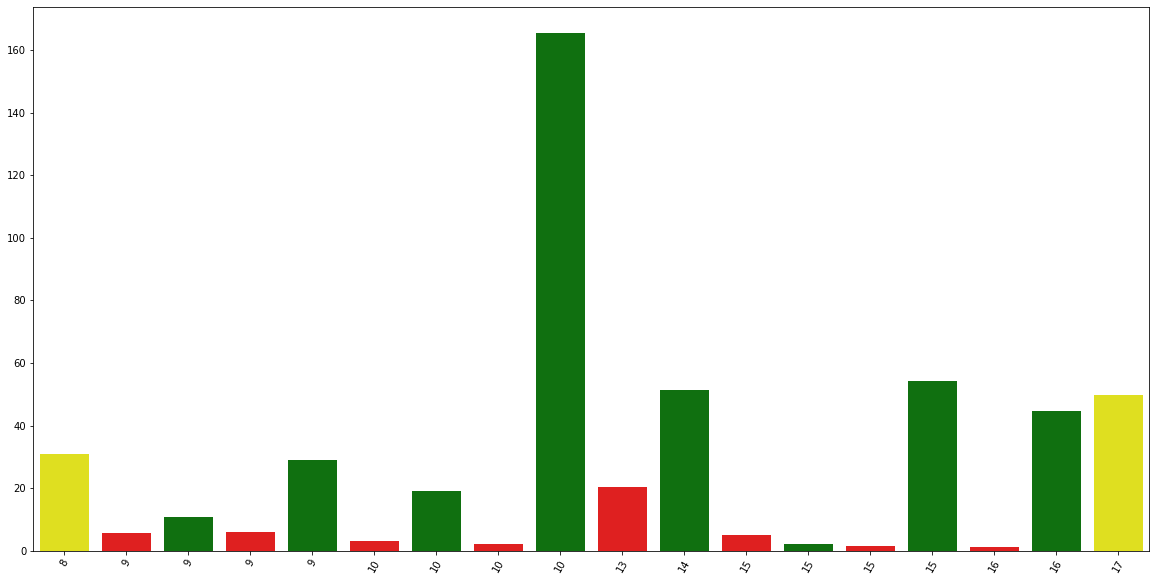

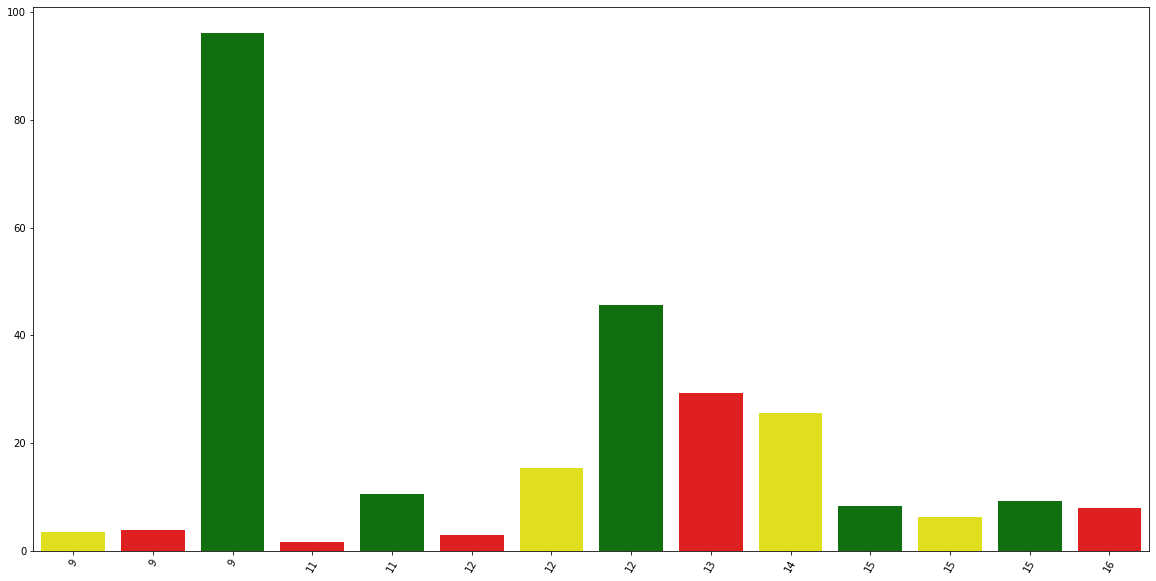

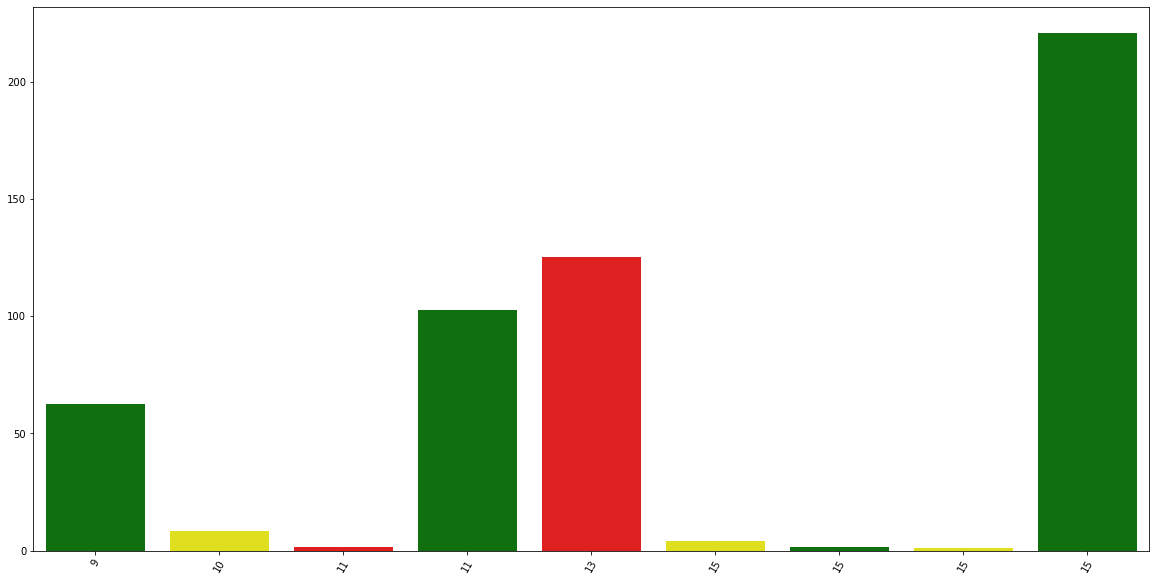

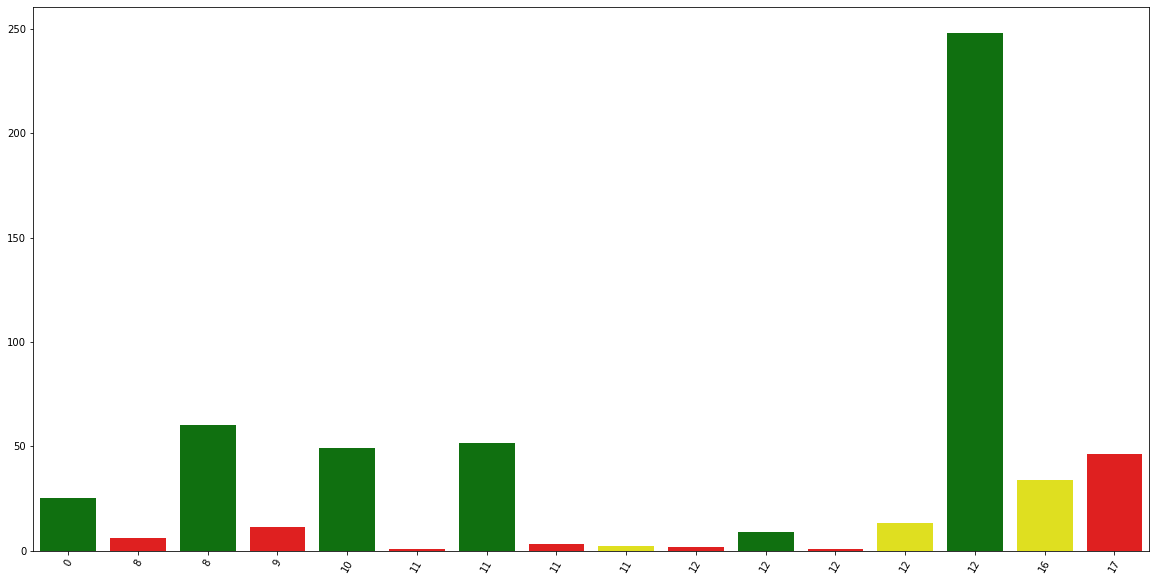

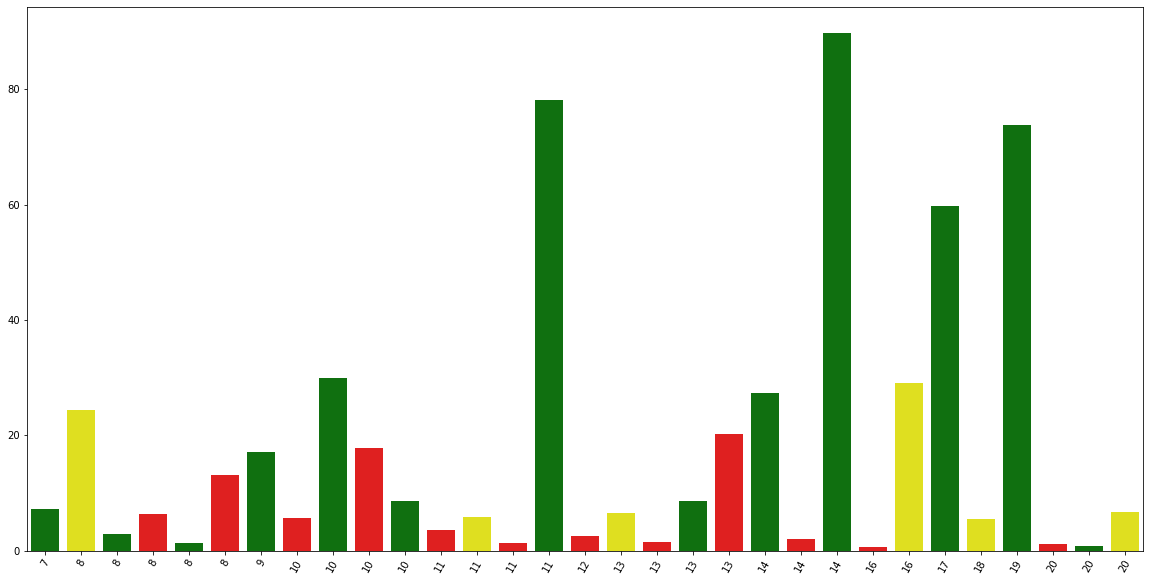

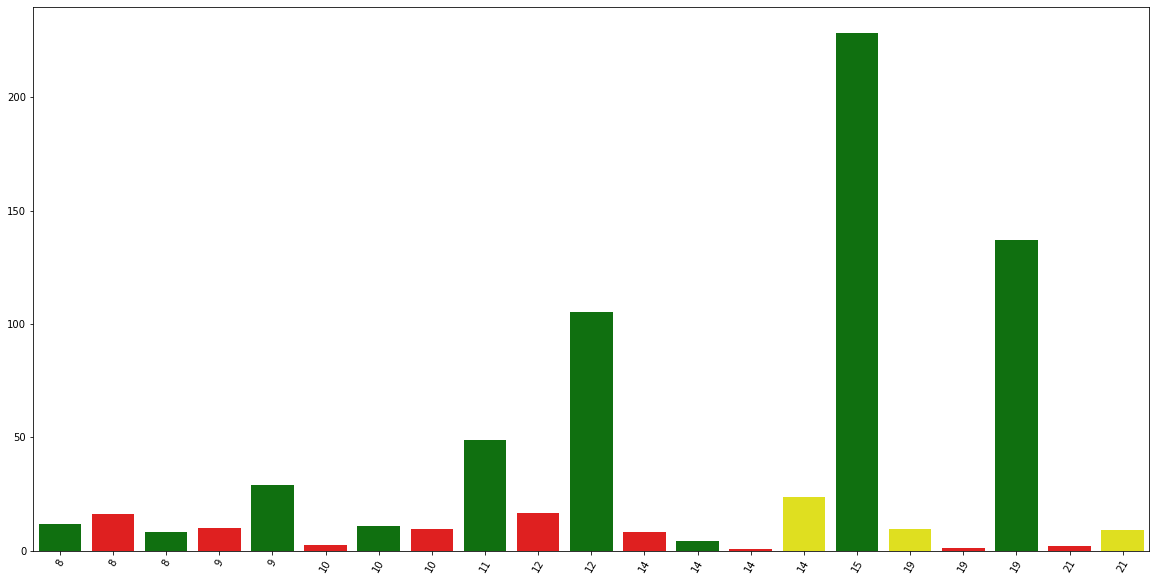

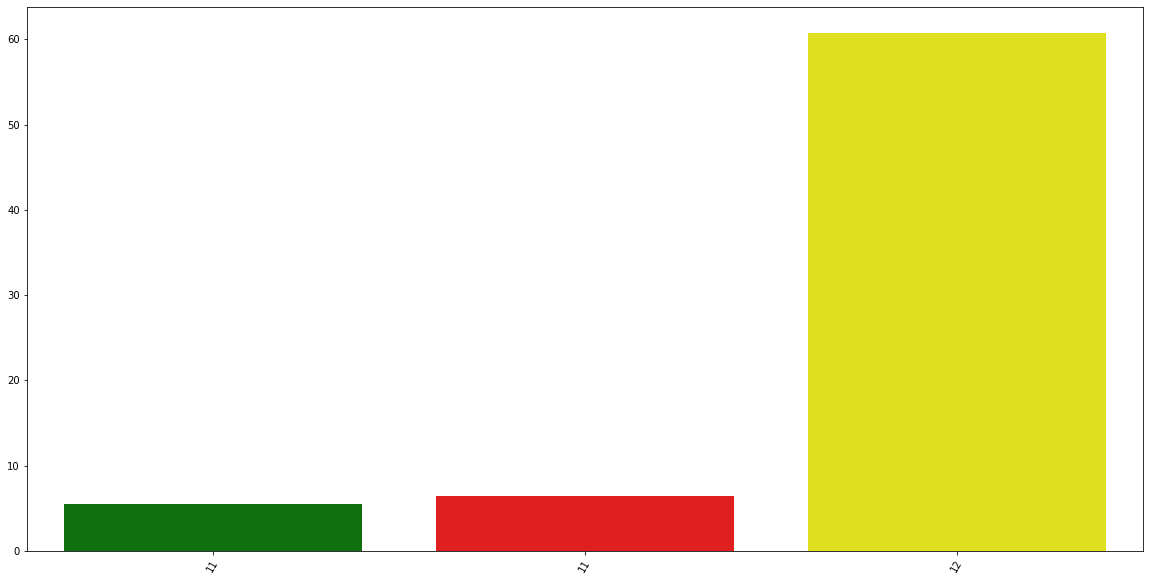

In [59]:

color_dict = {'still':'green', 'on_foot':'red', 'in_vehicle':'yellow'}

for i,df1 in df.groupby('day',as_index=False):
    colors = [color_dict[a] for a in df1['category'].values]
    plt.figure(figsize=(20,10))
    sns.barplot(x=df1['start'].values,y=df1['duration'].values,palette=colors)
    plt.xticks(np.arange(0,df1.shape[0],1),[a for i,a in enumerate(df1['start_hour'].values) if i%1==0],rotation=60)
    plt.show()

In [38]:
df

,timestamp,localtime,start,end,day,user,category,version,count_of_samples,duration,start_hour
0,2017-10-30 12:31:20.259,2017-10-30 20:31:20.259,2017-10-30 09:56:00,2017-10-30 12:30:00,20171030,00ab666c-afb8-476e-9872-6472b4e66b68,still,1,183.0,153.558000,9
1,2017-10-30 13:02:41.851,2017-10-30 21:02:41.851,2017-10-30 12:31:00,2017-10-30 13:00:00,20171030,00ab666c-afb8-476e-9872-6472b4e66b68,on_foot,1,90.0,29.642000,12
2,2017-10-30 14:06:58.533,2017-10-30 22:06:58.533,2017-10-30 13:02:00,2017-10-30 14:05:00,20171030,00ab666c-afb8-476e-9872-6472b4e66b68,still,1,88.0,62.521433,13
3,2017-10-30 14:24:11.272,2017-10-30 22:24:11.272,2017-10-30 14:06:00,2017-10-30 14:10:00,20171030,00ab666c-afb8-476e-9872-6472b4e66b68,on_foot,1,19.0,3.078200,14
4,2017-10-30 15:27:49.984,2017-10-30 23:27:49.984,2017-10-30 14:24:00,2017-10-30 15:07:00,20171030,00ab666c-afb8-476e-9872-6472b4e66b68,still,1,41.0,43.035867,14
...,...,...,...,...,...,...,...,...,...,...,...
95,2017-11-03 06:47:40.489,2017-11-03 14:47:40.489,2017-11-03 06:16:00,2017-11-03 06:42:00,20171103,00ab666c-afb8-476e-9872-6472b4e66b68,in_vehicle,1,416.0,26.253017,6
96,2017-11-03 06:56:13.822,2017-11-03 14:56:13.822,2017-11-03 06:47:00,2017-11-03 06:55:00,20171103,00ab666c-afb8-476e-9872-6472b4e66b68,still,1,100.0,8.013967,6
97,2017-11-03 07:18:38.713,2017-11-03 15:18:38.713,2017-11-03 06:56:00,2017-11-03 07:14:00,20171103,00ab666c-afb8-476e-9872-6472b4e66b68,on_foot,1,71.0,18.706633,6
98,2017-11-03 09:37:38.161,2017-11-03 17:37:38.161,2017-11-03 07:18:00,2017-11-03 09:32:00,20171103,00ab666c-afb8-476e-9872-6472b4e66b68,still,1,386.0,133.643317,7
